# 1D max t

## 4x1

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [4 1]
lattice: lattice constants: [1.45]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.175 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction: None.
Equalize: method: trf
Equalize: quantities: UT

H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.75s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian s

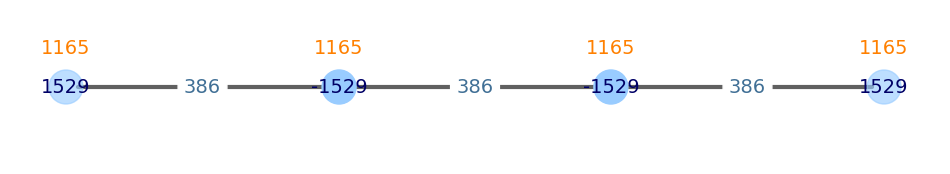

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.io import *

N = 20
L = 4
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, 1000),
                 lc=(1450,),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=2)
G.draw_graph()

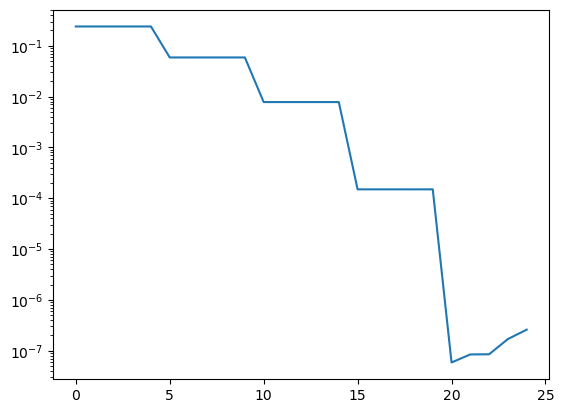

In [2]:
import matplotlib.pyplot as plt

plt.plot(G.eqinfo['fval'], '-')
plt.yscale('log')

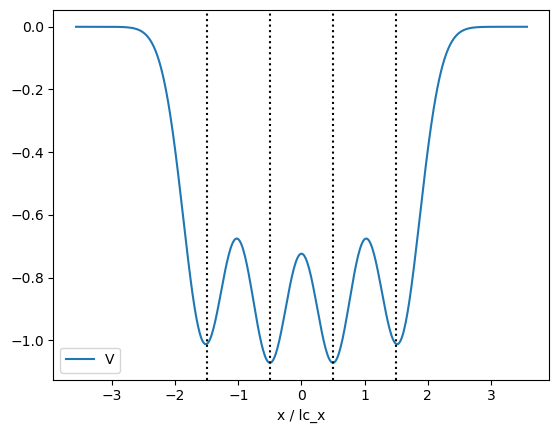

In [5]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5, linestyle=':', color='k')
plt.axvline(-0.5, linestyle=':', color='k')
plt.axvline(1.5, linestyle=':', color='k')
plt.axvline(0.5, linestyle=':', color='k')

H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 2.24s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 2.36s.
H_solver: eigenstates memory usage:  0.46 MiB.
Wannier WARNING: band gap is smaller than band width.
Single band optimization time: 0.0008349418640136719s.
Calculate U.
Single band interaction time: 0.46565985679626465s.


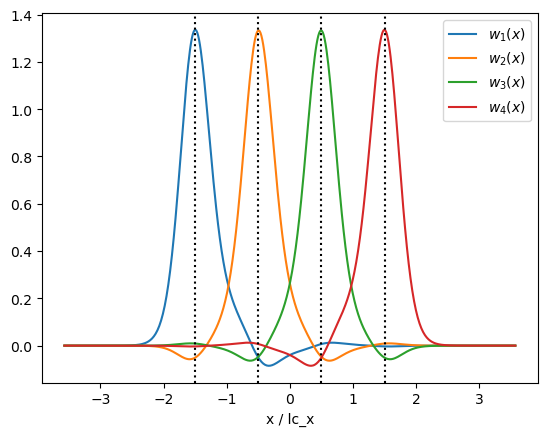

In [4]:
E, W, p = G.eigen_basis()
G.A, G.U, U = G.singleband_Hubbard(u=True, eig_sol=(E, W, p))

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / G.lc[0],
         fix_phase(wannier_func([x, y, z], U, G, W[0],  p[0])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5, linestyle=':', color='k')
plt.axvline(-0.5, linestyle=':', color='k')
plt.axvline(1.5, linestyle=':', color='k')
plt.axvline(0.5, linestyle=':', color='k')


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [4 1]
lattice: lattice constants: [1.45]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.175 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction: x.
Equalize: method: trf
Equalize: quantities: UvT

H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.57s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian sol

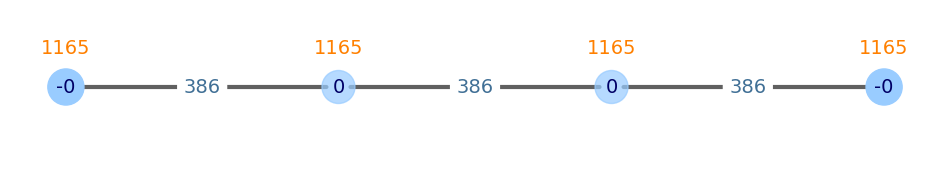

In [6]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 4
Ly = 1
d = 3
shape = 'square'
w = 'x'
eqt = 'UvT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, 1000),
                 lc=(1450,),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=2)
G.draw_graph()

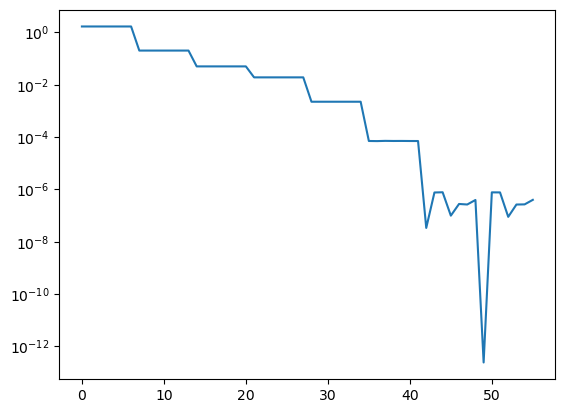

In [7]:
import matplotlib.pyplot as plt

plt.plot(G.eqinfo['fval'], '-')
plt.yscale('log')

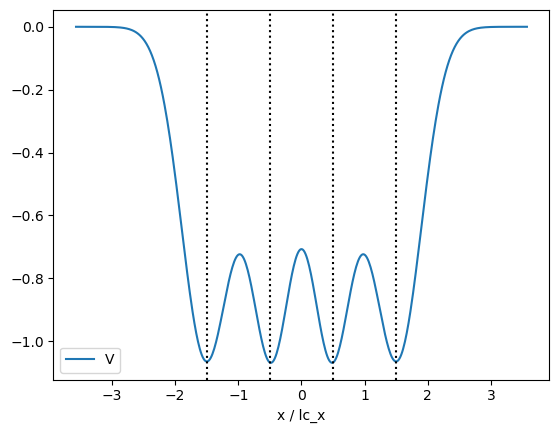

In [8]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5, linestyle=':', color='k')
plt.axvline(-0.5, linestyle=':', color='k')
plt.axvline(1.5, linestyle=':', color='k')
plt.axvline(0.5, linestyle=':', color='k')

H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.61s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.57s.
H_solver: eigenstates memory usage:  0.46 MiB.
Single band optimization time: 0.0008890628814697266s.
Calculate U.
Single band interaction time: 0.2454979419708252s.


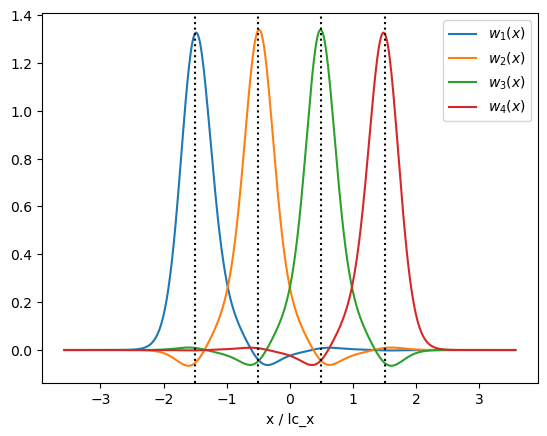

In [9]:
E, W, p = G.eigen_basis()
G.A, G.U, U = G.singleband_Hubbard(u=True, eig_sol=(E, W, p))

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / G.lc[0],
         fix_phase(wannier_func([x, y, z], U, G, W[0],  p[0])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5, linestyle=':', color='k')
plt.axvline(-0.5, linestyle=':', color='k')
plt.axvline(1.5, linestyle=':', color='k')
plt.axvline(0.5, linestyle=':', color='k')


### Is U bigger better or smaller better?

Equalize: scale_factor is not a number. Set to None.
Wannier WARNING: band gap is smaller than band width.
0.03513213761071997
0.03460139103611686


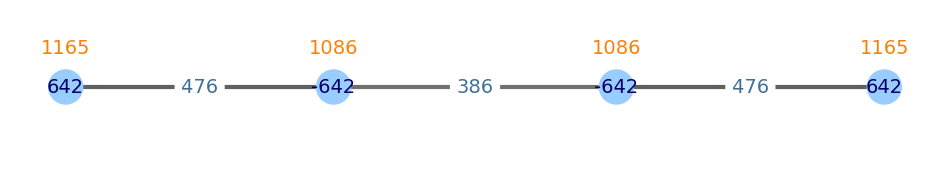

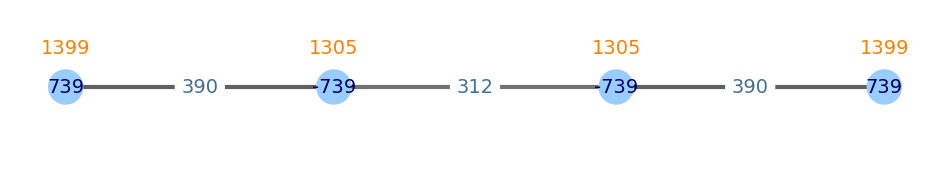

In [32]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 4
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, 1000),
                 lc=(1450,),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
G.draw_graph()
print(np.std(G.U) / np.mean(G.U))
G.Voff *= 1.2
G.draw_graph()
print(np.std(G.U) / np.mean(G.U))


Larger U is better.

## 6x1 1.45w

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [6 1]
lattice: lattice constants: [1.45]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[44 20 20] is set.
DVR: R0=[6.625 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction: None.
Equalize: method: trf
Equalize: quantities: UT

H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.83s.
H_solver: eigenstates memory usage:  0.91 MiB.
H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian s

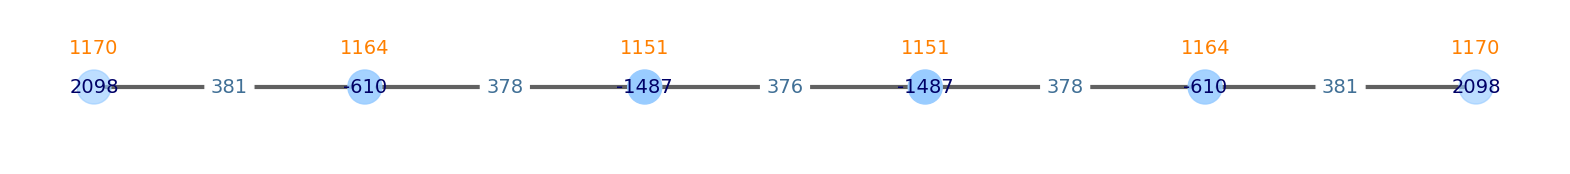

In [10]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 6
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, 1000),
                 lc=(1450,),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=2)
G.draw_graph()

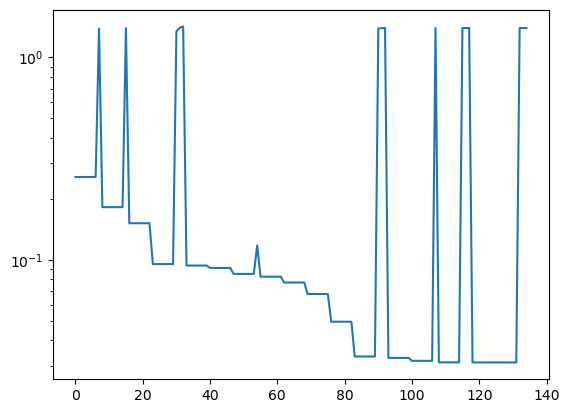

In [11]:
import matplotlib.pyplot as plt

plt.plot(G.eqinfo['fval'], '-')
plt.yscale('log')


Equalize: current trap depths: [1.02561047 1.05900617 1.07266069]
Equalize: current trap centers:
[[-2.520525    0.        ]
 [-1.49639089  0.        ]
 [-0.49753847  0.        ]]
lattice: Full lattice sizes updated to: [6 1 1]
lattice: lattice constants updated to: [1.45 1.45 1.45]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[44 20 20] is set.
DVR: R0=[6.625 3.    7.2  ]w is set.
H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.82s.
H_solver: eigenstates memory usage:  0.91 MiB.
H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.81s.
H_solver: eigenstates memory usage:  0.89 MiB.
Wannier WARNING: band gap is smaller than band width.
H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaus

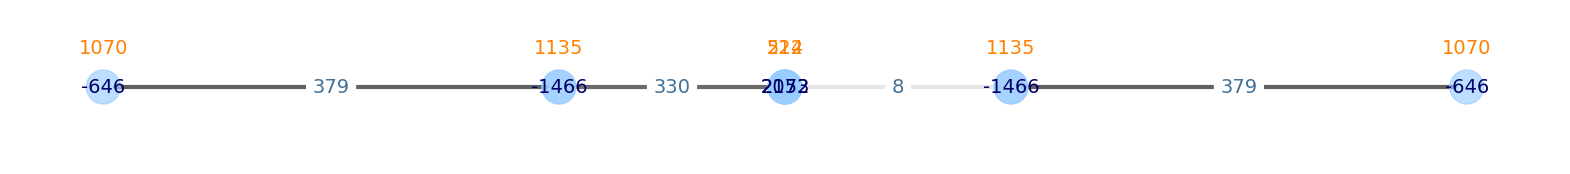

In [23]:
G.Voff, G.waists, G.trap_centers, __ = G.param_unfold(G.eqinfo['x'][-1])
E, W, p = G.eigen_basis()
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, None, None, G.sf))
cu = np.sqrt(G.u_cost_func(G.U, None, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')
G.draw_graph(A=G.A, U=G.U)

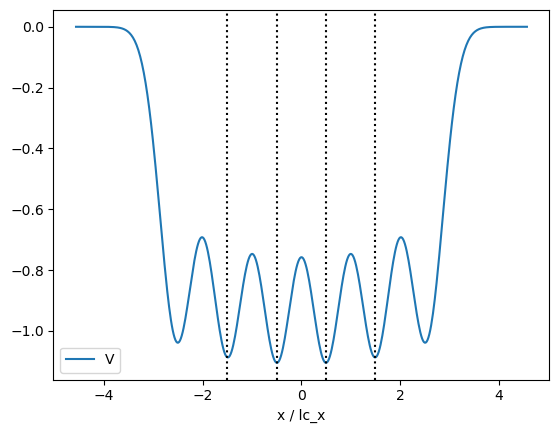

In [24]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5, linestyle=':', color='k')
plt.axvline(-0.5, linestyle=':', color='k')
plt.axvline(1.5, linestyle=':', color='k')
plt.axvline(0.5, linestyle=':', color='k')

H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.95s.
H_solver: eigenstates memory usage:  0.91 MiB.
H_op: n=[44 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.30s.
H_solver: eigenstates memory usage:  0.89 MiB.
Wannier WARNING: band gap is smaller than band width.
Single band optimization time: 0.0012040138244628906s.
Calculate U.
Single band interaction time: 0.3497459888458252s.


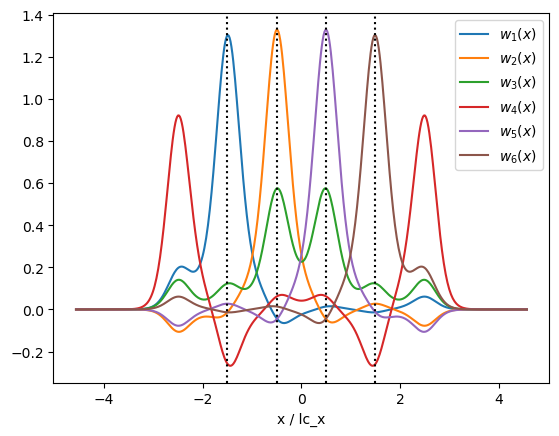

In [25]:
E, W, p = G.eigen_basis()
G.A, G.U, U = G.singleband_Hubbard(u=True, eig_sol=(E, W, p))

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / G.lc[0],
         fix_phase(wannier_func([x, y, z], U, G, W[0],  p[0])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5, linestyle=':', color='k')
plt.axvline(-0.5, linestyle=':', color='k')
plt.axvline(1.5, linestyle=':', color='k')
plt.axvline(0.5, linestyle=':', color='k')


In [20]:
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, None, (G.sf, None), G.sf))
cu = np.sqrt(G.u_cost_func(G.U, None, G.sf))

V = [ 2.09761276 -0.61047081 -1.48714196 -1.48714196 -0.61047081  2.09761276]
Onsite potential target=3.552713678800501e-15
Onsite potential cost cv^2=16.10809932126577
Tunneling target=(0.38016922688652743, None)
Tunneling cost ct^2=4.331929815904256e-05
Onsite interaction target fixed to 1.161537008918664
Onsite interaction cost cu^2=0.0004675068990773456


## 6x1 1.5w

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [6 1]
lattice: lattice constants: [1.5]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[45 20 20] is set.
DVR: R0=[6.75 3.   7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction: None.
Equalize: method: trf
Equalize: quantities: UT

H_op: n=[45 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.96s.
H_solver: eigenstates memory usage:  0.93 MiB.
H_op: n=[45 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solve

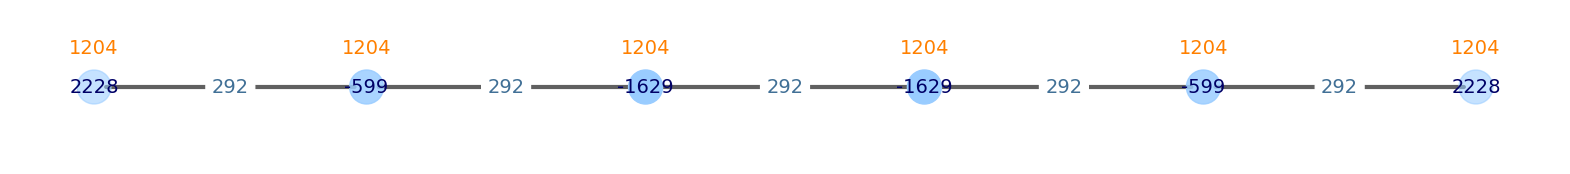

In [26]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 6
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, 1000),
                 lc=(1500,),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=2)
G.draw_graph()

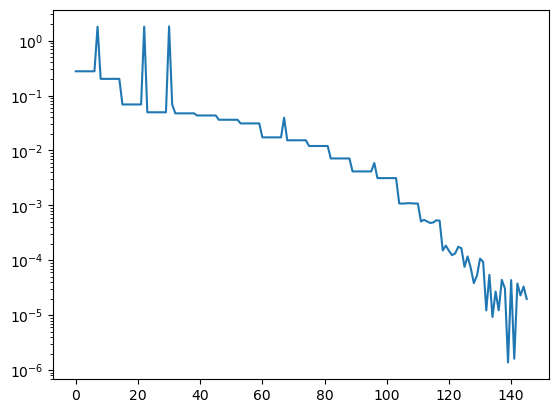

In [27]:
import matplotlib.pyplot as plt

plt.plot(G.eqinfo['fval'], '-')
plt.yscale('log')

1.5w is roughly the limit.